# Coding Temple's Data Analytics Course
---
## Python for Data Analysis: Working with APIs and Web Scraping

## What is an API?

API stands for Application Programming Interface. API's are a way for two applications to communicate to one another and are commonly used to retrieve and send data using code. An API follows this format: ![](https://www.altexsoft.com/media/2019/06/1.png)


The API exists with constant communication between the server and the internet. When we create our application, or the web app in browser, we make a requests to that API through the internet for information and the API responds with that data, if we are allowed to access it.

Another way to think of it could be: 

![](https://images.ctfassets.net/wqwerb01q4v1/5KgFJ5hSoJqT5NPkfOI0Fb/2bf6e6d5776c91ce5f2cc6ca1eb40dd0/How_Do_APIs_Work_5.png)


To talk to the API, we need to import a package called `requests` to handle the connection and communication for us. We also will want to import a package called `json` to work with the data that is returned by the API. 

In [3]:
# Side note, anything created in Python is considered an application
#import the packages we need:
import requests, json

/Users/investmentguy/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# What does requests do?
help(requests)

Help on package requests:

NAME
    requests

DESCRIPTION
    Requests HTTP Library
    ~~~~~~~~~~~~~~~~~~~~~
    
    Requests is an HTTP library, written in Python, for human beings.
    Basic GET usage:
    
       >>> import requests
       >>> r = requests.get('https://www.python.org')
       >>> r.status_code
       200
       >>> b'Python is a programming language' in r.content
       True
    
    ... or POST:
    
       >>> payload = dict(key1='value1', key2='value2')
       >>> r = requests.post('https://httpbin.org/post', data=payload)
       >>> print(r.text)
       {
         ...
         "form": {
           "key1": "value1",
           "key2": "value2"
         },
         ...
       }
    
    The other HTTP methods are supported - see `requests.api`. Full documentation
    is at <https://requests.readthedocs.io>.
    
    :copyright: (c) 2017 by Kenneth Reitz.
    :license: Apache 2.0, see LICENSE for more details.

PACKAGE CONTENTS
    __version__
    _internal_utils

In [5]:
# What does json do? It stands for JavaScript Object Notation
help(json)

Help on package json:

NAME
    json

MODULE REFERENCE
    https://docs.python.org/3.9/library/json
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    JSON (JavaScript Object Notation) <http://json.org> is a subset of
    JavaScript syntax (ECMA-262 3rd edition) used as a lightweight data
    interchange format.
    
    :mod:`json` exposes an API familiar to users of the standard library
    :mod:`marshal` and :mod:`pickle` modules.  It is derived from a
    version of the externally maintained simplejson library.
    
    Encoding basic Python object hierarchies::
    
        >>> import json
        >>> json.dumps(['foo', {'bar': ('baz', None, 1.0, 2)}])
        '["foo", {"bar": ["baz", null, 1.0,

We will be connecting to the Ergast F1 Racer API today. You can look at the API docs here:
http://ergast.com/mrd/



In [6]:
# help(requests)
url = 'http://ergast.com/api/f1/2008/5/driverStandings.json'

In [7]:
#response object
response = requests.get(url)
print(response)

<Response [200]>


In [8]:
#check and make sure we got a successful response from the API
response.ok

True

In [9]:
#view the response as a JSON
response.json()

{'MRData': {'xmlns': 'http://ergast.com/mrd/1.5',
  'series': 'f1',
  'url': 'http://ergast.com/api/f1/2008/5/driverstandings.json',
  'limit': '30',
  'offset': '0',
  'total': '22',
  'StandingsTable': {'season': '2008',
   'round': '5',
   'StandingsLists': [{'season': '2008',
     'round': '5',
     'DriverStandings': [{'position': '1',
       'positionText': '1',
       'points': '35',
       'wins': '2',
       'Driver': {'driverId': 'raikkonen',
        'permanentNumber': '7',
        'code': 'RAI',
        'url': 'http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C3%B6nen',
        'givenName': 'Kimi',
        'familyName': 'Räikkönen',
        'dateOfBirth': '1979-10-17',
        'nationality': 'Finnish'},
       'Constructors': [{'constructorId': 'ferrari',
         'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari',
         'name': 'Ferrari',
         'nationality': 'Italian'}]},
      {'position': '2',
       'positionText': '2',
       'points': '28',
       'wins': '2',
 

In [10]:
type(response.json())

dict

In [11]:
# We only want the Driver Standings
my_racer_data = response.json()['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']
my_racer_data

[{'position': '1',
  'positionText': '1',
  'points': '35',
  'wins': '2',
  'Driver': {'driverId': 'raikkonen',
   'permanentNumber': '7',
   'code': 'RAI',
   'url': 'http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C3%B6nen',
   'givenName': 'Kimi',
   'familyName': 'Räikkönen',
   'dateOfBirth': '1979-10-17',
   'nationality': 'Finnish'},
  'Constructors': [{'constructorId': 'ferrari',
    'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari',
    'name': 'Ferrari',
    'nationality': 'Italian'}]},
 {'position': '2',
  'positionText': '2',
  'points': '28',
  'wins': '2',
  'Driver': {'driverId': 'massa',
   'permanentNumber': '19',
   'code': 'MAS',
   'url': 'http://en.wikipedia.org/wiki/Felipe_Massa',
   'givenName': 'Felipe',
   'familyName': 'Massa',
   'dateOfBirth': '1981-04-25',
   'nationality': 'Brazilian'},
  'Constructors': [{'constructorId': 'ferrari',
    'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari',
    'name': 'Ferrari',
    'nationality': 'Italian'}]},
 {'po

In [12]:
# What if I only wanted the driver's name?
driver = [response.json()['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings'][x]['Driver']['familyName'] for x in range(len(my_racer_data))]
driver

['Räikkönen',
 'Massa',
 'Hamilton',
 'Kubica',
 'Heidfeld',
 'Kovalainen',
 'Webber',
 'Alonso',
 'Trulli',
 'Rosberg',
 'Nakajima',
 'Button',
 'Bourdais',
 'Coulthard',
 'Glock',
 'Fisichella',
 'Barrichello',
 'Piquet Jr.',
 'Sato',
 'Davidson',
 'Sutil',
 'Vettel']

In [ ]:
# Create a function to get racer info
def get_racer_info(data):
    """
    Input: response object from API
    Takes the response and creates a dictionary containing the fields we want from the racer's information
    Output: List object containing a dictionary for each racer in the response object
    """
    new_data = []
    for racer in data:
        racer_dict={}
        racer_name = f'{racer["Driver"]["givenName"]} {racer["Driver"]["familyName"]}'

        racer_dict[racer_name] = {
            'first_name' : racer['Driver']['givenName'],
            'last_name' : racer['Driver']['familyName'],
            'position' : racer['position'],
            'wins' : racer['wins'],
            'DOB' : racer['Driver']['dateOfBirth'],
            'nationality' : racer['Driver']['nationality'],
            'constructor' : racer['Constructors'][0]['name']
        }
        new_data.append(racer_dict)
    return new_data

get_racer_info(my_racer_data)

## In-Class Exercise:

Create a function that allows a user to see a specific year and round

## API's Part 2: Connecting to an API and returning an image

### Imports

In [13]:
import requests
import pandas as pd
from PIL import Image
from io import BytesIO

### Connect to the API

In [14]:
api_url = 'https://api.scryfall.com/bulk-data'

response = requests.get(api_url)

return_frame = pd.DataFrame.from_dict(requests.get((pd.DataFrame.from_dict(response.json()['data'])['download_uri']
                                                    [pd.DataFrame.from_dict(response.json()['data'])['type'] == 'oracle_cards'][0])).json())

In [15]:
return_frame

,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,life_modifier,hand_modifier,attraction_lights,color_indicator,printed_name,content_warning,variation_of,printed_type_line,printed_text,flavor_name
0,card,86bf43b1-8d4e-4759-bb2d-0b2e03ba7012,0004ebd0-dfd6-4276-b4a6-de0003e94237,[15862],15870.0,15871.0,3094.0,3081.0,Static Orb,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,7050735c-b232-47a6-a342-01795bfd0d46,0006faf6-7a61-426c-9034-579f2cfcfa83,[370780],49283.0,49284.0,69965.0,262945.0,Sensory Deprivation,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,e718b21b-46d1-4844-985c-52745657b1ac,0007c283-5b7a-4c00-9ca1-b455c8dff8c3,[470580],77122.0,NaN,196536.0,391692.0,Road of Return,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,036ef8c9-72ac-46ce-af07-83b79d736538,000d5588-5a4c-434e-988d-396632ade42c,[83282],22609.0,22610.0,12835.0,12551.0,Storm Crow,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,b125d1e7-5d9b-4997-88b0-71bdfc19c6f2,000e5d65-96c3-498b-bd01-72b1a1991850,[12380],12637.0,12638.0,6412.0,10604.0,Walking Sponge,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,card,d6695fa8-881c-407c-91d9-3ac770372d35,fffa9334-3576-4f70-9605-2ad062cdbc69,[430770],64646.0,64647.0,136683.0,298834.0,Without Weakness,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29216,card,90e0031e-de69-41e7-aef9-78ed1d4b3361,fffaa634-42a0-4038-b027-24f28754fec7,[611344],109300.0,NaN,491818.0,NaN,Firesong and Sunspeaker,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29217,card,22a6a5f1-1405-4efb-af3e-e1f58d664e99,fffcb71f-e802-436e-917d-eaa6607ab74f,"[503766, 503767]",87643.0,NaN,230214.0,530502.0,"Toralf, God of Fury // Toralf's Hammer",en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29218,card,d2341d0a-482c-4194-a8c9-088e27df1f4c,fffdc2ac-bde4-4e4c-a5bd-0e6c6e49ad91,[],NaN,NaN,137165.0,299018.0,"Samut, the Tested",en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Return an Image object

In [16]:
img_str = return_frame['image_uris'][return_frame['name'] == 'Static Orb'][0]['normal']
img_str

'https://cards.scryfall.io/normal/front/8/6/86bf43b1-8d4e-4759-bb2d-0b2e03ba7012.jpg?1562242171'

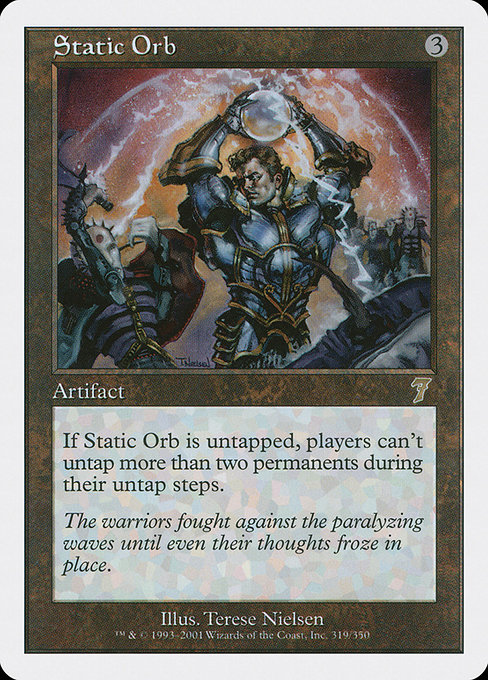

In [17]:
# Step 1: Get a response object using requests.get()
response = requests.get(img_str)

# Step 2 Use the PIL and BytesIO to open the image in Python!
img = Image.open(BytesIO(response.content))
img

In [ ]:
# Install Beautiful Soup
!python -m pip install beautifulsoup4

## Beautiful Soup

### Using Requests

In [18]:
# Connect to URL
page = requests.get('https://www.cs.cmu.edu/~rgs/alice-VII.html')

In [19]:
# display result response
page

<Response [200]>

#### .content()

In [20]:
# Check Status of request response
page.text

'<HTML>\n<HEAD>\n<Title>Alice\'s Adventures in Wonderland -- Chapter VII</Title>\n</HEAD>\n<BODY>\n<A NAME="PREV" HREF="alice-VI.html">Previous chapter:  Pig and Pepper</A><P>\n<H2>CHAPTER VII</H2>\n                         <H2>A Mad Tea-Party</H2>\n  There was a table set out under a tree in front of the house,\nand the March Hare and the Hatter were having tea at it:  a\nDormouse was sitting between them, fast asleep, and the other two\nwere using it as a cushion, resting their elbows on it, and talking\nover its head.  `Very uncomfortable for the Dormouse,\' thought Alice;\n`only, as it\'s asleep, I suppose it doesn\'t mind.\'\n<P>\n  The table was a large one, but the three were all crowded\ntogether at one corner of it:  `No room!  No room!\' they cried\nout when they saw Alice coming.  `There\'s <I>plenty</I> of room!\' said\nAlice indignantly, and she sat down in a large arm-chair at one\nend of the table.\n<P>\n<A HREF="alice25a.gif" target="picture"><IMG SRC="alice25th.gif"></

### Importing

In [21]:
from bs4 import BeautifulSoup

### Using Beautiful Soup

In [22]:
# Instantiate BeautifulSoup class
soup = BeautifulSoup(page.content, 'html.parser')

soup

<html>
<head>
<title>Alice's Adventures in Wonderland -- Chapter VII</title>
</head>
<body>
<a href="alice-VI.html" name="PREV">Previous chapter:  Pig and Pepper</a><p>
<h2>CHAPTER VII</h2>
<h2>A Mad Tea-Party</h2>
  There was a table set out under a tree in front of the house,
and the March Hare and the Hatter were having tea at it:  a
Dormouse was sitting between them, fast asleep, and the other two
were using it as a cushion, resting their elbows on it, and talking
over its head.  `Very uncomfortable for the Dormouse,' thought Alice;
`only, as it's asleep, I suppose it doesn't mind.'
<p>
  The table was a large one, but the three were all crowded
together at one corner of it:  `No room!  No room!' they cried
out when they saw Alice coming.  `There's <i>plenty</i> of room!' said
Alice indignantly, and she sat down in a large arm-chair at one
end of the table.
<p>
<a href="alice25a.gif" target="picture"><img src="alice25th.gif"/></a>
<b>Mad Tea Party</b>
<p>
  `Have some wine,' the Ma

### .prettify()

In [23]:
#NOTE: Prettify only works for the full document and the .find() method
# Basically transform the html output into a 'pretty' string. Sometimes this works, sometimes it doesn't.
print(soup.prettify())

<html>
 <head>
  <title>
   Alice's Adventures in Wonderland -- Chapter VII
  </title>
 </head>
 <body>
  <a href="alice-VI.html" name="PREV">
   Previous chapter:  Pig and Pepper
  </a>
  <p>
   <h2>
    CHAPTER VII
   </h2>
   <h2>
    A Mad Tea-Party
   </h2>
   There was a table set out under a tree in front of the house,
and the March Hare and the Hatter were having tea at it:  a
Dormouse was sitting between them, fast asleep, and the other two
were using it as a cushion, resting their elbows on it, and talking
over its head.  `Very uncomfortable for the Dormouse,' thought Alice;
`only, as it's asleep, I suppose it doesn't mind.'
   <p>
    The table was a large one, but the three were all crowded
together at one corner of it:  `No room!  No room!' they cried
out when they saw Alice coming.  `There's
    <i>
     plenty
    </i>
    of room!' said
Alice indignantly, and she sat down in a large arm-chair at one
end of the table.
    <p>
     <a href="alice25a.gif" target="picture">

### Converting to a List

In [24]:
# Tags may contain strings and other tags. These elements are the tag’s children.
print(list(soup.children))
print(f'Count of children: {len(list(soup.children))}')

[<html>
<head>
<title>Alice's Adventures in Wonderland -- Chapter VII</title>
</head>
<body>
<a href="alice-VI.html" name="PREV">Previous chapter:  Pig and Pepper</a><p>
<h2>CHAPTER VII</h2>
<h2>A Mad Tea-Party</h2>
  There was a table set out under a tree in front of the house,
and the March Hare and the Hatter were having tea at it:  a
Dormouse was sitting between them, fast asleep, and the other two
were using it as a cushion, resting their elbows on it, and talking
over its head.  `Very uncomfortable for the Dormouse,' thought Alice;
`only, as it's asleep, I suppose it doesn't mind.'
<p>
  The table was a large one, but the three were all crowded
together at one corner of it:  `No room!  No room!' they cried
out when they saw Alice coming.  `There's <i>plenty</i> of room!' said
Alice indignantly, and she sat down in a large arm-chair at one
end of the table.
<p>
<a href="alice25a.gif" target="picture"><img src="alice25th.gif"/></a>
<b>Mad Tea Party</b>
<p>
  `Have some wine,' the M

### Extracting Beautiful Soup Elements

In [25]:
# We can traverse through an HTML page and extract other tags and text
# The below example shows the types of iterables available in the object created from the HTML Document
# .Tag allows us to dive deeper into the document i.e we can look for HTML attributes like .class and if needed go deeper into the document from there
[type(item) for item in list(soup.children)]

[bs4.element.Tag, bs4.element.NavigableString]

### Assinging Variables from Beautiful Soup

In [30]:
import pprint
# This is the longer way but easy way to hone in on the area you want to access

html = list(soup.children)[0] # Selecting the HTML element child from the soup object
html
body = list(html.children)[3] # Selecting the body element from the HTML child
center = list(body.children)[2] # Selecting the center of the body from the body children
table = list(center.children)[5]
table.prettify()

<html>
<head>
<title>Alice's Adventures in Wonderland -- Chapter VII</title>
</head>
<body>
<a href="alice-VI.html" name="PREV">Previous chapter:  Pig and Pepper</a><p>
<h2>CHAPTER VII</h2>
<h2>A Mad Tea-Party</h2>
  There was a table set out under a tree in front of the house,
and the March Hare and the Hatter were having tea at it:  a
Dormouse was sitting between them, fast asleep, and the other two
were using it as a cushion, resting their elbows on it, and talking
over its head.  `Very uncomfortable for the Dormouse,' thought Alice;
`only, as it's asleep, I suppose it doesn't mind.'
<p>
  The table was a large one, but the three were all crowded
together at one corner of it:  `No room!  No room!' they cried
out when they saw Alice coming.  `There's <i>plenty</i> of room!' said
Alice indignantly, and she sat down in a large arm-chair at one
end of the table.
<p>
<a href="alice25a.gif" target="picture"><img src="alice25th.gif"/></a>
<b>Mad Tea Party</b>
<p>
  `Have some wine,' the Ma

### .find() <br>
<p>Find a specific instance of the parameter passed in</p>

In [27]:
table.find('b')

<b>Mad Tea Party</b>

### .find_all() <br>
<p>Similar to .find(), except this will return all of them instead of one</p>

In [28]:
text_corpus = [] # text corpus is a text of documents

for node in table.find_all('b'):
    text_corpus.append(node.get_text())
    
text_corpus

['Mad Tea Party',
 'Hatter engaging in rhetoric',
 'Hatter and Hare dunking Dormouse']

## Exercise <br>
<p>Using the Beautiful Soup library, grab the data from the following link: https://www.nbastuffer.com/2019-2020-nba-player-stats/. After getting the data, display the players name and team inside of a pandas dataframe.</p>

In [ ]:
# Step 1: imports
import pandas as pd
# Step 2: Create a request object using the .get(<url>) method on the url
page_nba = requests.get('https://www.nbastuffer.com/2019-2020-nba-player-stats/')

# Step 3: We are going to make some soup!
# Using the beautiful soup class, we can take the text off the page and parse it with the HTML parser
soup = BeautifulSoup(page_nba, 'html.parser')

# Noe that we have the data, we can work with it:
# Step $: Instantiate two empty lists
names = []
teams = []

# Step 5a: Interate though the document to get the info we need.
# We can use the find_all method to create an interable, >soup.fin_all(>tag<) tage = 'tr'
# We can then append each value for name and team for their respective lists using indexing
# We can verify by printing each BEFORE adding to the list
# print(soup.find_all('tr))

for node in soup.find_all('tr'):
    names.append.find_all(string=True[1])
    teams.append.fin_all(string=True)

# Bonus Example: Pulling Vegas Odds from PFR.com

<h3> Use this example for further reference</h3>
<p> This is an example that shows what we will get returned back to us when accessing a HTML document with Beautiful Soup</p>

In [ ]:
page = requests.get('https://www.pro-football-reference.com/boxscores/201810140nwe.htm')
# print(page.status_code)

soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
print(soup.prettify())

In [ ]:
for section in list(soup.children):
    print(section)
    print('1\n2\n3\n')

In [ ]:
html = list(soup.children)[3]

html

In [ ]:
body = list(html.children)[3]

for el in list(body.children):
    print(el)
    print('\n\n\n\n123\n\n\n\n')

In [ ]:
table = body.find_all('div')

print(table)

In [ ]:
from bs4 import Comment

comments=soup.find_all(string=lambda text:isinstance(text,Comment)) # This is going to iterate through and check to see if there are any comments

for comment in comments:
    comment=BeautifulSoup(str(comment))
    log = comment.find('table', {'id':'game_info'}) #search it as an ordinary tag
    if log:
        print(log)